In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Rhayven\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r"C:\Users\Rhayven\Downloads\FB Alan Peter Cayetano_sentiment_improved.csv")

Confusion Matrix:
[[ 10  64  54]
 [  7 294 113]
 [  3  70 671]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.08      0.14       128
     Neutral       0.69      0.71      0.70       414
    Positive       0.80      0.90      0.85       744

    accuracy                           0.76      1286
   macro avg       0.66      0.56      0.56      1286
weighted avg       0.73      0.76      0.73      1286

Overall Accuracy: 0.76


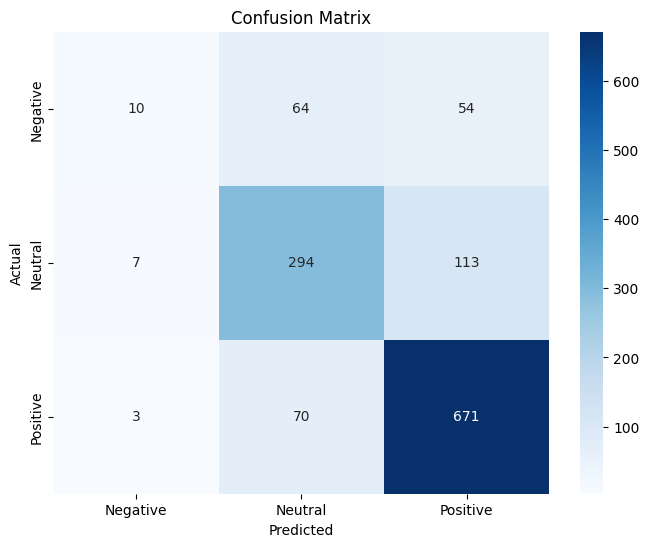

In [3]:
X = df['comment']
y = df['final_sentiment']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(rf_classifier, X_tfidf, y, cv=skf)

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y, y_pred))

accuracy = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold = 1
fold_accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)
    print(f"Fold {fold} Accuracy: {acc:.2f}")
    fold += 1

print(f"\nAverage Accuracy across 10 folds: {np.mean(fold_accuracies):.2f}")


Fold 1 Accuracy: 0.74
Fold 2 Accuracy: 0.79
Fold 3 Accuracy: 0.75
Fold 4 Accuracy: 0.71
Fold 5 Accuracy: 0.73
Fold 6 Accuracy: 0.78
Fold 7 Accuracy: 0.77
Fold 8 Accuracy: 0.77
Fold 9 Accuracy: 0.73
Fold 10 Accuracy: 0.81

Average Accuracy across 10 folds: 0.76
